
# <span style="color:rgb(213,80,0)">Primer Examen Parcial de Robótica</span>

## Documentación del modelado matemático de un robot SCARA

Alumno: Juárez Ugalde Ricardo

## Resumen

En el presente reporte se documenta el desarrollo del modelado matemático de un robot SCARA de tres eslabones en serie conectados entre sí por juntas rotacionales.


El análisis incluye la obtención del modelo cinemático directo e inverso, tanto de la postura como de las velocidades y de las aceleraciónes.


Asimimso, se desarrollan las expresiones necesarias para describir la dinámica directa e inversa del sistema mediante el método de Eüler \- Lagrange.


Se calcularon los vectores de posición de los centros de masa, propagación de velocidades angulares y lineales, se definieron matrices de inercia generalizadas y se obtuvieron los efectos de coriollis, y de la gravedad.

#### Objetivos:
-  Obtener el modelado cinemático de la postura del robót
-  Obtener el modelo cinemático de las velocidades (directo e inverso)
-  Obtener el modelo cinemático de las aceleraciones (directo e inverso)
-  Obtener el modelo dinámico
-  Comprender el comportamiento cinemático y dinámico del robot a partir de la obtención de los modelos matemáticos.
## Definición de la transformación homogénea general

En este apartado se define la matríz de transformación homogénea general para describir la posición y orientación de un sistema de referenica "i" con respecto a otro sistema de referencia "j".


Esta matríz es de 4x4 y contiene la siguente información:

-  Una matríz de rotación 3x3 que representa la orientación del sistema "i" respecto al sistema "j".
-  Un vector de posición 3x1 que representa la posicion del origen del sistema "i" respecto al origen del sistema "j".
-  Un vector de perspectiva 3x1 (en este caso y en la robótica siempre será nulo).
-  Un factor de escala, que modifica el tamaño de los vectores (siempre será unitario).

In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Modelado del robot Scara

En el siguente diagrama se describe el robot SCARA en el plano. Este robot consta de tres eslabones conectados entre sí mediante juntas rotacionales. En el extremo del tercer eslabón (representado de color azul) se ubica el punto P, que representa el lugar geométrico donde se encuentra el efector final. Este punto será el principal objetivo de análisis en este reporte, ya que corresponde al punto de interacción del robot con el entorno.


El primer paso es definir todas las variables geométricas que ayudarán a describir el robot:

-  A cada junta rotacional se le asigna un sistema de referencia.
-  Las variables que ayudarán a describir las posiciones de cada uno de los eslabones están representadas con $\theta \;$ , por ejemplo ${}^0{\theta \;}_1$ representa el ángulo entre el eje $x$ del sistema {1} respecto al sistema {0}
-  Las longitudes de los eslabones están representadas con $L$

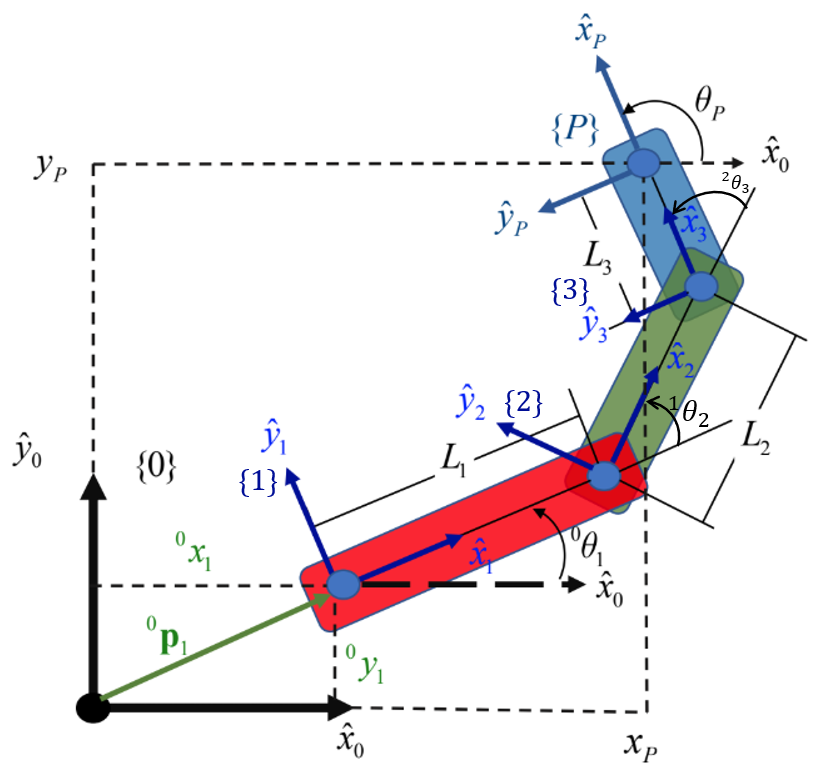

### Planteamiento del modelo cinemático directo de la postura

En este análisis, el objetivo es obtener una expresión matemática que describa el vector de postura del sistema de referencia {P}. Esta expresión permitirá determinar tanto la posición como la orientación que adoptará la herramienta que acoplada al robot durante la ejecución de una tarea (considerando que dicha herramienta se encuentra en el origen del sistema {P}).


Para obtener la expresión, se requiere obtener la matríz de transfomración homogénea que va desde del sistema {P} al sistema de referencia inercial {0}, es decir, $^0 T_P$ .


$$^0 T_P =^0 T_1 \cdot ^1 T_2 \cdot ^2 T_3 \cdot ^3 T_P$$

Se obtiene $^0 T_1$ :


In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1

T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)


Se obtiene $^1 T_2$ :


In [3]:

T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)


Se obtiene  $^2 T_3$ :


In [4]:

T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)


Se obtiene  $^3 T_P$ :


In [5]:

T_3_P = Tij(L_3,0,0,0,0,0)


Se obtiene  $^0 T_P$ :


In [6]:

T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)


Una vez obtenida la matríz de transformación $^0 T_P$ es posible obtener el vector de postura del robot. Este vector describe:

-  La posición del origen del sistema {P} en el plano $\textrm{xy}$
-  La orientación del sistema {P} respecto al sistema {0}

**Vector de postura del robot**


In [7]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]


Entonces, el modelo cinemático directo de la postura es:


$$^0 {{\xi }}_P =^0 {{\xi }}_P (q)$$
$$=\left\lbrack \begin{array}{c} {}^0x_P\newline {}^0y_P\newline {}^0{\theta \;}_P \end{array}\right\rbrack =\left\lbrack \begin{array}{c} x_{O,1} +L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)+L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline y_{O,1} +L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\sin \left(\theta_{O,1} \right)+L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline \theta_{1,2} +\theta_{2,3} +\theta_{O,1}  \end{array}\right\rbrack$$

A continuación se definen los vectores de posición de cada una de las juntas rotacionales, ya que serán útiles para cálculos posteriores.


In [8]:
syms p_0_1 p_1_2 p_2_3
p_0_1 = [T_O_1(1,4); T_O_1(2,4); T_O_1(3,4)]

In [9]:
p_1_2 = [T_1_2(1,4); T_1_2(2,4); T_1_2(3,4)]

In [10]:
p_2_3 = [T_2_3(1,4); T_2_3(2,4); T_2_3(3,4)]


### Modelo cinemático directo de las velocidades

Se tiene el modelo cinemático de la postura, ahora se requiere determinar cómo cambia la posición y orientación del origen del sistema {P} con respecto al tiempo, es decir, su velocidad lineal y angular.


Para obtener el modelo se aplica el operador de derivada total respecto al tiempo al modelo cinemático directo de la postura, de la siguiente manera:


$$^0 {{\xi }}_P =^0 {{\xi }}_P (q)$$

Donde:


 $^0 {{\xi }}_P$ : Vector de postura del sistema {P} exrpesado en el sistema base {0}


 $q=\left\lbrack \theta_{0,1} ,\theta_{1,2} ,\theta_{2,3} \right\rbrack$ o bien $q=[^0 \theta_1 ,^1 \theta_2 ,^2 \theta_3 ]$ : Vector de configuración


Se aplica la derivada total respecto al tiempo usando la regla de la cadena, se tiene:


$$\frac{d}{dt}^0 {{\xi }}_P =\frac{d}{dt}^0 {{\xi }}_P (q)$$

$$\frac{d}{dt}^0 {{\xi }}_P =\frac{\partial }{\partial ^0 {{\theta }}_1 }^0 {{\xi }}_P (q)^0 {\dot{{\theta }} }_1 +\frac{\partial }{\partial ^1 {{\theta }}_2 }^0 {{\xi }}_P (q)^1 {\dot{{\theta }} }_2 +\frac{\partial }{\partial ^2 {{\theta }}_3 }^0 {{\xi }}_P (q)^2 {\dot{{\theta }} }_3$$

Se expresa en forma matricial:


$$\frac{d}{\textrm{dt}}{}^0{\zeta }_P=\left\lbrack \begin{array}{ccc} \frac{\partial }{\partial {}^0{\theta }_1}{}^0{\xi }_P\left(q\right) & \frac{\partial }{\partial {}^1{\theta }_2}{}^0{\xi }_P\left(q\right) & \frac{\partial }{\partial {}^2{\theta }_3}{}^0{\xi }_P\left(q\right) \end{array}\right\rbrack \left\lbrack \begin{array}{c} \overset{\cdot }{{}^0{\theta }_1} \newline \overset{\cdot }{{}^1{\theta }_2} \newline \overset{\cdot }{{}^2{\theta }_3}  \end{array}\right\rbrack$$

Se oberva que la matríz de la izquierda corresponde al jacobiano del vector de configuración:


$$\left\lbrack \begin{array}{ccc} \frac{\partial }{\partial {}^0{\theta }_1}{}^0{\xi }_P\left(q\right) & \frac{\partial }{\partial {}^1{\theta }_2}{}^0{\xi }_P\left(q\right) & \frac{\partial }{\partial {}^2{\theta }_3}{}^0{\xi }_P\left(q\right) \end{array}\right\rbrack =J_{\theta \;} \left(q\right)$$

Mientras que el vector de la izquierda corresponde al vector de configuración derivado respecto al tiempo


$$\left\lbrack \begin{array}{c} \overset{\cdot }{{}^0{\theta }_1} \newline \overset{\cdot }{{}^1{\theta }_2} \newline \overset{\cdot }{{}^2{\theta }_3}  \end{array}\right\rbrack =\overset{\cdot }{q}$$

Entonces, el modelo cinemático directo de las velocidades queda expresado como:


$$\overset{\cdot }{{}^0{\zeta }_P} =J_{\theta \;} \left(q\right)\overset{\cdot }{q}$$

Lo siguiente es calcular el jacobiano del vector de configuración:


In [11]:
syms J_theta q q_dot
J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])


Entonces, el modelo cinemático directo de las velocidades es:


$$\left\lbrack \begin{array}{c} \overset{\ldotp }{{}^0x_P} \newline \overset{\ldotp }{{}^0y_P} \newline \overset{\ldotp }{{}^0{\theta \;}_P}  \end{array}\right\rbrack =\left\lbrack \begin{array}{ccc} -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_1 \,\sin \left(\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)+L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline 1 & 1 & 1 \end{array}\right\rbrack \left\lbrack \begin{array}{c} \overset{\cdot }{{\theta \;}_{0,1} } \newline \overset{\cdot }{{\theta \;}_{1,2} } \newline \overset{\cdot }{{\theta \;}_{2,3} }  \end{array}\right\rbrack$$
### Modelo cinemático inverso de las velocidades

Este modelo es importante para describir cómo deben moverse cada uno de los eslabones del robot (en partucular los actuadores que estarán conectados en cada articulación) para lograr una velocidad determinada en el sistema {P}, donde estará colocada la herramienta.


A partir del modelo cinemático directo de las velocidades, podemos obtener la siguiente relación:


$$\overset{\ldotp }{q} =J_{\theta \;}^{-1\;} \left(q\right)\overset{\cdot }{{}^0{\zeta }_P}$$

Obtenemos el inverso de la matríz Jacobiana:


In [12]:
simplify(inv(J_theta))


De esta manera, el modelo cinemático inverso de las velocidades queda como:


$$\left\lbrack \begin{array}{c} \overset{\cdot }{{\theta \;}_{0,1} } \newline \overset{\cdot }{{\theta \;}_{1,2} } \newline \overset{\cdot }{{\theta \;}_{2,3} }  \end{array}\right\rbrack =\left(\begin{array}{ccc} \frac{\cos \left(\theta_{1,2} +\theta_{O,1} \right)}{L_1 \,\sin \left(\theta_{1,2} \right)} & \frac{\sin \left(\theta_{1,2} +\theta_{O,1} \right)}{L_1 \,\sin \left(\theta_{1,2} \right)} & \frac{L_3 \,\sin \left(\theta_{2,3} \right)}{L_1 \,\sin \left(\theta_{1,2} \right)}\newline -\frac{L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)}{L_1 \,L_2 \,\sin \left(\theta_{1,2} \right)} & -\frac{L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\sin \left(\theta_{O,1} \right)}{L_1 \,L_2 \,\sin \left(\theta_{1,2} \right)} & -\frac{L_3 \,{\left(L_1 \,\sin \left(\theta_{1,2} +\theta_{2,3} \right)+L_2 \,\sin \left(\theta_{2,3} \right)\right)}}{L_1 \,L_2 \,\sin \left(\theta_{1,2} \right)}\newline \frac{\cos \left(\theta_{O,1} \right)}{L_2 \,\sin \left(\theta_{1,2} \right)} & \frac{\sin \left(\theta_{O,1} \right)}{L_2 \,\sin \left(\theta_{1,2} \right)} & \frac{L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} \right)+L_2 \,\sin \left(\theta_{1,2} \right)}{L_2 \,\sin \left(\theta_{1,2} \right)} \end{array}\right)\left\lbrack \begin{array}{c} \overset{\ldotp }{{}^0x_P} \newline \overset{\ldotp }{{}^0y_P} \newline \overset{\ldotp }{{}^0{\theta \;}_P}  \end{array}\right\rbrack$$

### Modelo cinemático directo de las aceleaciones

El modelo cinemático directo de las aceleraciones se puede obtener aplicando el operador de derivada total respecto al tiempo al modelo cinemático directo de las velocidades.


$$\overset{\cdot }{{}^0{\zeta }_P} =J_{\theta \;} \left(q\right)\overset{\cdot }{q}$$

Aplicamos la derivada total:


$$\overset{\cdot \cdot }{{}^0{\zeta }_P} =\overset{\cdot }{J_{\theta \;} } \left(q\right)\overset{\cdot }{q} +J_{\theta \;} \left(q\right)\overset{\cdot \cdot }{q}$$

Obtenemos la derivada de la matríz jacobiana:


In [13]:
J_theta_dot = diff(J_theta)


Entonces el modelo cinemático directo de las aceleraciones queda descrito de la siguiente manera:


$$\left\lbrack \begin{array}{c} \overset{\ldotp \ldotp }{{}^0x_P} \newline \overset{\ldotp \ldotp }{{}^0y_P} \newline \overset{\ldotp \ldotp }{{}^0{\theta \;}_P}  \end{array}\right\rbrack =\left\lbrack \begin{array}{ccc} -L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline 0 & 0 & 0 \end{array}\right\rbrack \left\lbrack \begin{array}{c} \overset{\cdot }{{\theta \;}_{0,1} } \newline \overset{\cdot }{{\theta \;}_{1,2} } \newline \overset{\cdot }{{\theta \;}_{2,3} }  \end{array}\right\rbrack +\left\lbrack \begin{array}{ccc} -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_1 \,\sin \left(\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)-L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & -L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)+L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) & L_3 \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline 1 & 1 & 1 \end{array}\right\rbrack \left\lbrack \begin{array}{c} \overset{\cdot \cdot }{{\theta \;}_{0,1} } \newline \overset{\cdot \cdot }{{\theta \;}_{1,2} } \newline \overset{\cdot \cdot }{{\theta \;}_{2,3} }  \end{array}\right\rbrack$$
### Modelo cinemático inverso de las aceleaciones

Se puede obtener el modelo cinemático inverso de las aceleraciones aplicando el operador de derivada total respecto al tiempo al modelo cinemático inverso de las velocidades, de la siguiente manera:


$$\overset{\ldotp }{q} =J_{\theta \;}^{-1\;} \left(q\right)\overset{\cdot }{{}^0{\zeta }_P}$$

Aplicamos derivada total:


$$\overset{\cdot \cdot }{q} =\overset{\cdot }{J_{\theta \;}^{-1\;} \left(q\right)} \overset{\cdot }{{}^0{\zeta }_P} +J_{\theta \;}^{-1\;} \left(q\right)\overset{\cdot \cdot }{{}^0{\zeta }_P}$$

Calculamos la derivada de la matríz jacobiana inversa:


In [14]:
J_teta_inv_dot = simplify(diff(inv(J_theta)))


En la sección anterior se calculó el inverso de la matríz jacobiana. Entonces, el modelo cinemático inverso de las aceleraciones queda descrito de la siguiente manera:


$$\left\lbrack \begin{array}{c} \overset{\cdot \cdot }{{\theta \;}_{0,1} } \newline \overset{\cdot \cdot }{{\theta \;}_{1,2} } \newline \overset{\cdot \cdot }{{\theta \;}_{2,3} }  \end{array}\right\rbrack =\left(\begin{array}{ccc} \frac{\cos \left(\theta_{O,1} \right)}{L_1 \,\sigma_1 } & -\frac{\sin \left(\theta_{O,1} \right)}{L_1 \,{\sin \left(\theta_{1,2} \right)}^2 } & \frac{L_3 \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{2,3} \right)}{L_1 \,\sigma_1 }\newline -\frac{\cos \left(\theta_{O,1} \right)\,\sigma_2 }{L_1 \,L_2 \,\sigma_1 } & -\frac{\sin \left(\theta_{O,1} \right)\,\sigma_2 }{L_1 \,L_2 \,\sigma_1 } & -\frac{L_3 \,\sin \left(\theta_{2,3} \right)\,{\left(L_1 +L_2 \,\cos \left(\theta_{1,2} \right)\right)}}{L_1 \,L_2 \,\sigma_1 }\newline \frac{\cos \left(\theta_{1,2} \right)\,\cos \left(\theta_{O,1} \right)}{L_2 \,\sigma_1 } & \frac{\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{O,1} \right)}{L_2 \,\sigma_1 } & -\frac{L_3 \,\sin \left(\theta_{2,3} \right)}{L_2 \,{\sin \left(\theta_{1,2} \right)}^2 } \end{array}\right)\left\lbrack \begin{array}{c} \overset{\ldotp }{{}^0x_P} \newline \overset{\ldotp }{{}^0y_P} \newline \overset{\ldotp }{{}^0{\theta \;}_P}  \end{array}\right\rbrack +\left(\begin{array}{ccc} \frac{\cos \left(\theta_{1,2} +\theta_{O,1} \right)}{L_1 \,\sin \left(\theta_{1,2} \right)} & \frac{\sin \left(\theta_{1,2} +\theta_{O,1} \right)}{L_1 \,\sin \left(\theta_{1,2} \right)} & \frac{L_3 \,\sin \left(\theta_{2,3} \right)}{L_1 \,\sin \left(\theta_{1,2} \right)}\newline -\frac{L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)}{L_1 \,L_2 \,\sin \left(\theta_{1,2} \right)} & -\frac{L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\sin \left(\theta_{O,1} \right)}{L_1 \,L_2 \,\sin \left(\theta_{1,2} \right)} & -\frac{L_3 \,{\left(L_1 \,\sin \left(\theta_{1,2} +\theta_{2,3} \right)+L_2 \,\sin \left(\theta_{2,3} \right)\right)}}{L_1 \,L_2 \,\sin \left(\theta_{1,2} \right)}\newline \frac{\cos \left(\theta_{O,1} \right)}{L_2 \,\sin \left(\theta_{1,2} \right)} & \frac{\sin \left(\theta_{O,1} \right)}{L_2 \,\sin \left(\theta_{1,2} \right)} & \frac{L_3 \,\sin \left(\theta_{1,2} +\theta_{2,3} \right)+L_2 \,\sin \left(\theta_{1,2} \right)}{L_2 \,\sin \left(\theta_{1,2} \right)} \end{array}\right)\left\lbrack \begin{array}{c} \overset{\ldotp \ldotp }{{}^0x_P} \newline \overset{\ldotp \ldotp }{{}^0y_P} \newline \overset{\ldotp \ldotp }{{}^0{\theta \;}_P}  \end{array}\right\rbrack$$

donde:


$$\sigma_1 ={\cos \left(\theta_{1,2} \right)}^2 -1$$

$$\sigma_2 =L_2 +L_1 \,\cos \left(\theta_{1,2} \right)$$
## Modelo dinámico directo por ecuaciones de Eüler\-Lagrange
### Cálculo de la posición de los centros de masa

En este apartado se calcula la posición de los centros de masa de cada uno de los eslabones que confroman el robot respecto al sistema de referencia inercial {0}.


El análisis se realiza de manera generalizada, es decir, se asume que los centros de masa se no encuenrtan en la mitad de los eslabones, sin embargo, para simplificar el desarrollo matemático, se considera que el centro de masa se encuentra ubicado sobre ele eje $x$ del sistema de referencia asociado a cada eslabón.


Lo anterior se puede apreciar en el siguiente diagrama:


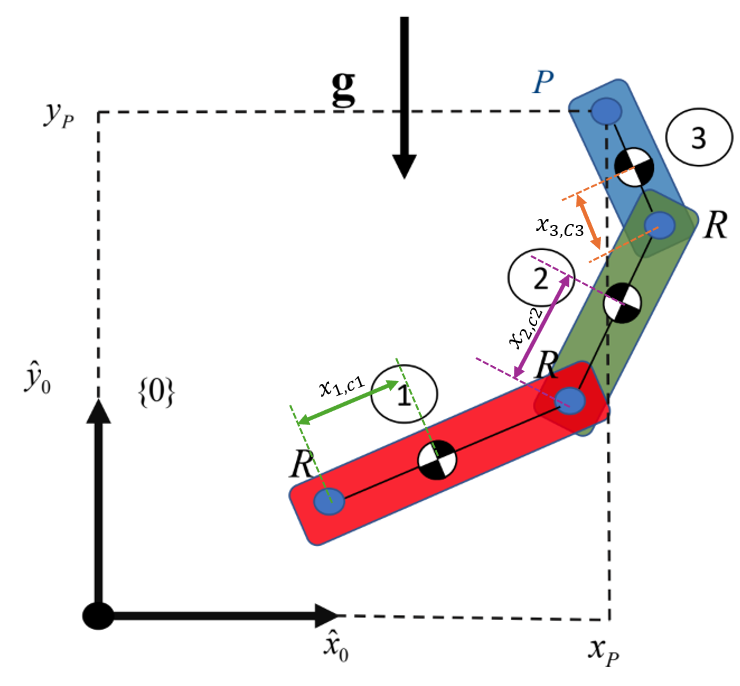


Definimos $x_{1,\textrm{C1}}$ como la coordenada en $\overset{\wedge }{x_1 }$ de la ubicación del centro de masa del eslabón 1 (color rojo) respecto al sistema de referenica {1}


Definimos $x_{2,\textrm{C2}}$ como la coordenada en $\overset{\wedge }{x_2 }$ de la ubicación del centro de masa eslabón 2 (color verde) respecto al sistema de referenica {2}


Definimos $x_{3,\textrm{C3}}$ como la coordenada en $\overset{\wedge }{x_3 }$ de la ubicación del centro de masa eslabón 3 (color azul) respecto al sistema de referenica {3}


Otro paso importante es colocar un sistema de referencia sobre cada uno de los centros de masa, cuyos ejes son paralelos al sistema de referencia de la junta del eslabón en el que se encuentra, como se describe en el siguiente diagrama:


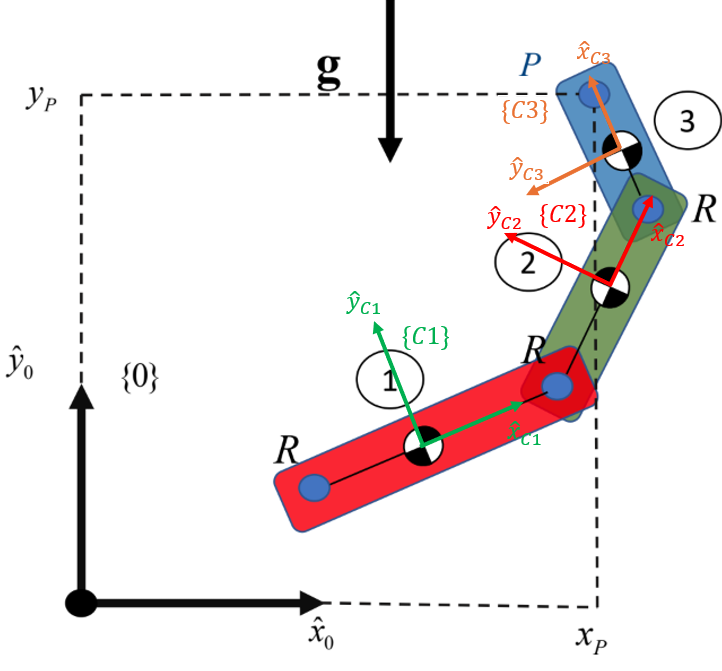


Se calcula una matríz de transformación que relacione la posición del centro de masa $\textrm{C1}$ respecto al sistema base {0}. Dicha matríz de transformación se puede obtener de la siguiente manera:


$${}^0T_{\textrm{C1}}={}^0T_1{}^1T_{\textrm{C1}}$$

Se define la matríz ${}^1T_{C1}$ . Como los ejes del sistema de referencia {C1} son paralelos al del sistema {1}, no existe rotación alguna sobre sus ejes, esto implica que la matríz de rotación será la matríz identidad. El vector de posición sólo tendrá componente en el eje $x$ , ya que el centro de masa se encuentra sobre dicho eje.


In [15]:
syms x_1_C1 x_2_C2 x_3_C3

T_1_C1 = Tij(x_1_C1,0,0,0,0,0)


Se obtiene ${}^0T_{\textrm{C1}}$


In [16]:
T_O_C1 = T_O_1*T_1_C1


De esta manera, podemos extraer la ubicación del centro de masa de acuerdo con la información que arroja la matríz:


$$\textrm{C1}=\left\lbrack \begin{array}{c} x_{O,1} +x_{1,\textrm{C1}} \,\cos \left(\theta_{O,1} \right)\newline y_{O,1} +x_{1,\textrm{C1}} \,\sin \left(\theta_{O,1} \right) \end{array}\right\rbrack$$


Ahora se calcula una matríz de transformación que relacione la posición del centro de masa $\textrm{C2}$ respecto al sistema base {0}. Dicha matríz de transformación se puede obtener de la siguiente manera:


$${}^0T_{\textrm{C2}}={}^0T_1{}^1T_2{}^2T_{\textrm{C2}}$$

Se define la matríz ${}^2T_{\textrm{C2}}$ :


In [17]:
T_2_C2 = Tij(x_2_C2,0,0,0,0,0)


Se obtiene ${}^0T_{\textrm{C2}}$ :


In [18]:
T_O_C2 = simplify(T_O_1*T_1_2*T_2_C2)


Entonces la posición del centro de masa $\textrm{C2}$ está dado por:


$$\textrm{C2}=\left\lbrack \begin{array}{c} x_{O,1} +x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)\newline y_{O,1} +x_{2,\textrm{C2}} \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\sin \left(\theta_{O,1} \right) \end{array}\right\rbrack$$


Por último, se calcula una matríz de transformación que relacione la posición del centro de masa $\textrm{C3}$ respecto al sistema base {0}. Dicha matríz de transformación se puede obtener de la siguiente manera:


$${}^0T_{\textrm{C3}}={}^0T_1{}^1T_2{}^2T_3{}^3T_{\textrm{C3}}$$

Se define la matríz ${}^3T_{\textrm{C3}}$ :


In [19]:
T_3_C3 = Tij(x_3_C3,0,0,0,0,0)


Se obtiene ${}^0T_{\textrm{C3}}$ :


In [20]:
T_O_C3 = simplify(T_O_1*T_1_2*T_2_3*T_3_C3)


Entonces la posición del centro de masa $\textrm{C3}$ está dado por:


$$\textrm{C3}=\left\lbrack \begin{array}{c} x_{O,1} +L_2 \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)+x_{3,\textrm{C3}} \cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)\newline y_{O,1} +x_{3,\textrm{C3}} \sin \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right)+L_2 \,\sin \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\sin \left(\theta_{O,1} \right) \end{array}\right\rbrack$$


A continuación se definirán los vectores de posición de cada uno de los centros de masa:


In [21]:
syms p_O_C1 p_O_C2 p_O_C3 p_1_C1 p_2_C2 p_3_C3
p_O_C1 = [T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)]

In [22]:
p_O_C2 = simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)])

In [23]:

p_O_C3 = simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)])

In [24]:
p_1_C1 = [T_1_C1(1,4); T_1_C1(2,4); T_1_C1(3,4)]

In [25]:
p_2_C2 = [T_2_C2(1,4); T_2_C2(2,4); T_2_C2(3,4)]

In [26]:
p_3_C3 = [T_3_C3(1,4); T_3_C3(2,4); T_3_C3(3,4)]

### Cálculo de la propagación de velocidades angulares

En esta sección se determina la velocidad angular de cada uno de los eslabones del robot, a partir del movimiento de sus articulaciónes. Esto permitirá calcular posteriormente la energía cinética y potencial para obtener las fuerzas internas del sistema.


La velocidad angular de cada eslabon se calcula de manera recursiva, comenzando desde el sistema de referenica inercial hasta el efector final. A continuación se presenta el cálculo de la propagación para el primer eslabón.


La propagación para el primer eslabón estará dada por la ecuación:


$${}^1{\omega \;}_1={}^1R_0{}^0{\omega \;}_0+{}^1{\widehat{z} }_1\overset{\cdot }{\theta {\;}_1 }$$

In [27]:
syms omega_1_1 omega_2_2 omega_3_3 theta_dot_O_1 theta_dot_1_2 theta_dot_2_3


Se define el vector ${}^0{\omega \;}_0$


In [28]:
omega_O_O = [0;0;0]

omega_O_O = 3x1
     0
     0
     0


Se define el vector ${}^1{\widehat{z} }_1$ , que describe la dirección del eje de rotación ( a continuación se usa la notación "n" de manera generalziada, ya que el movimiento puede producirse alrededor de un eje arbitrario)


In [29]:
n_1_1 = [0;0;1]

n_1_1 = 3x1
     0
     0
     1


Se define la matríz de rotación que va del sistema {1} al sistema {0}.Esta matríz se obtiene a partir de la matríz de transformación homogénea que va del sistema {1} al sistema {0} obtenida en una sección anterior de este reporte.


In [30]:
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]


Para obtener la matríz de rotación ${}^1R_0$ aplicando la transpuesta a la matríz de rotación ${}^0R_1$ :


In [31]:
R_1_O = transpose(R_O_1)


Entonces, se obtiene la propagación ${}^1{\omega \;}_1$ :


In [32]:
omega_1_1 = R_1_O*omega_O_O+n_1_1*theta_dot_O_1


De manera similar, se obtiene la propagación para el segundo eslabón ${}^2{\omega \;}_2$ :


$${}^2{\omega \;}_2={}^2R_1{}^1{\omega \;}_1+{}^2{\widehat{z} }_2\overset{\cdot }{\theta {\;}_2 }$$

Se define el vector ${}^2{\widehat{z} }_2$ :


In [33]:
n_2_2 = [0;0;1]

n_2_2 = 3x1
     0
     0
     1


Se define la matríz de rotación que va del sistema {2} al sistema {1}.


In [34]:
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]


Para obtener la matríz de rotación ${}^2R_1$ aplicando la transpuesta a la matríz de rotación ${}^1R_2$ :


In [35]:
R_2_1 = transpose(R_1_2)


Entonces, se obtiene la propagación ${}^2{\omega \;}_2$ :


In [36]:
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2


Finalmente, se obtiene la propagación para el tercer eslabón ${}^3{\omega \;}_3$ :


$${}^3{\omega \;}_3={}^3R_2{}^2{\omega \;}_2+{}^3{\widehat{z} }_3\overset{\cdot }{\theta {\;}_3 }$$

Se define el vector ${}^3{\widehat{z} }_3$ :


In [37]:
n_3_3 = [0;0;1]

n_3_3 = 3x1
     0
     0
     1


Se define la matríz de rotación que va del sistema {3} al sistema {2}.


In [38]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]


Para obtener la matríz de rotación ${}^3R_2$ aplicando la transpuesta a la matríz de rotación ${}^2R_3$ :


In [39]:
R_3_2 = transpose(R_2_3)


Entonces, se obtiene la propagación ${}^3{\omega \;}_3$ :


In [40]:
omega_3_3 = R_3_2*omega_2_2+n_3_3*theta_dot_2_3

### Cálculo de la propagación de las velocidades lineales

En esta sección se obtendran las velocidades lineales asociadas a cada sistema de referencia y asociadas a cada uno de los centros de masa de cada eslabón.


La velocidad propagada del sistema de referencia {1} está dada por:


$${}^1V_1={}^1R_0\left({}^0V_0+{}^0{\omega \;}_0\times {}^0P_1\right)$$

In [41]:
syms v_1_1 v_0_0
v_0_0 = [0; 0; 0];
v_1_1 = R_1_O*(v_0_0+cross(omega_O_O, p_0_1))


La velocidad propagada del sistema de referencia {2} está dada por:


$${}^2V_2={}^2R_1\left({}^1V_1+{}^1{\omega \;}_1\times {}^1P_2\right)$$

In [42]:
v_2_2 = R_2_1*(v_1_1+cross(omega_1_1, p_1_2))


La velocidad propagada del sistema de referencia {3} está dada por:


$${}^3V_3={}^3R_2\left({}^2V_2+{}^2{\omega \;}_2\times {}^2P_3\right)$$

In [43]:
syms v_3_3
v_3_3 = R_3_2*(v_2_2+cross(omega_2_2, p_2_3))

### Velocidades de los centros de masa

La velocidad propagada del centro de masa del primer eslabón $\textrm{C1}\;$ está dada por:


$${}^{\textrm{C1}}V_{\textrm{C1}}={}^{\textrm{C1}}R_1\left({}^1V_1+{}^1{\omega \;}_1\times {}^1P_{\textrm{C1}}\right)$$

Es posible extraer la matríz de rotación ${}^1R_{\textrm{C1}}$ a partir de la matríz de transformación ${}^1T_{\textrm{C1}}$ calculada anteriormente


In [44]:
syms v_C1_C1 R_1_C1

T_1_C1


Se extrae la matríz de rotación ${}^1R_{\textrm{C1}}$ :


In [45]:
R_1_C1=[T_1_C1(1,1), T_1_C1(1,2), T_1_C1(1,3); T_1_C1(2,1), T_1_C1(2,2), T_1_C1(2,3); T_1_C1(3,1), T_1_C1(3,2), T_1_C1(3,3)]


Se obtiene la matríz de rotación ${}^{\textrm{C1}}R_1$ aplicando la transpuesta a la matríz ${}^1R_{\textrm{C1}}$ :


In [46]:
R_C1_1 = transpose(R_1_C1)


Se calcula ${}^{\textrm{C1}}V_{\textrm{C1}}$


In [47]:
v_C1_C1 = R_C1_1*(v_1_1+cross(omega_1_1, p_1_C1))


La velocidad propagada del centro de masa del segundo eslabón $\textrm{C2}$ está dada por:


$${}^{\textrm{C2}}V_{\textrm{C2}}={}^{\textrm{C2}}R_2\left({}^2V_2+{}^2{\omega \;}_2\times {}^2P_{C2}\right)$$

In [48]:
syms v_C2_C2 R_2_C2


Se extrae la matríz de rotación ${}^2R_{\textrm{C2}}$ :


In [49]:
R_2_C2=[T_2_C2(1,1), T_2_C2(1,2), T_2_C2(1,3); T_2_C2(2,1), T_2_C2(2,2), T_2_C2(2,3); T_1_C1(3,1), T_2_C2(3,2), T_2_C2(3,3)]


Se obtiene la matríz de rotación ${}^{\textrm{C2}}R_1$ aplicando la transpuesta a la matríz ${}^1R_{\textrm{C2}}$ :


In [50]:
R_C2_2 = transpose(R_2_C2)


Se calcula ${}^{\textrm{C2}}V_{\textrm{C2}}$


In [51]:
v_C2_C2 = R_C2_2*(v_2_2+cross(omega_2_2, p_2_C2))


La velocidad propagada del centro de masa del tercer eslabón $\textrm{C3}$ está dada por:


$${}^{\textrm{C3}}V_{\textrm{C3}}={}^{\textrm{C3}}R_3\left({}^3V_3+{}^3{\omega \;}_3\times {}^3P_{\textrm{C3}}\right)$$

In [52]:
syms v_C3_C3 R_3_C3


Se extrae la matríz de rotación ${}^3R_{\textrm{C3}}$ :


In [53]:
R_3_C3=[T_3_C3(1,1), T_3_C3(1,2), T_3_C3(1,3); T_3_C3(2,1), T_3_C3(2,2), T_3_C3(2,3); T_1_C1(3,1), T_3_C3(3,2), T_3_C3(3,3)]


Se obtiene la matríz de rotación ${}^{\textrm{C3}}R_1$ aplicando la transpuesta a la matríz ${}^1R_{\textrm{C3}}$ :


In [54]:
R_C3_3 = transpose(R_3_C3)


Se calcula ${}^{\textrm{C3}}V_{\textrm{C3}}$


In [55]:
v_C3_C3 = R_C3_3*(v_3_3+cross(omega_3_3, p_3_C3))

### Defición de los elementos de inercia

Para calcular la energía cinética de cada eslabón es necesario conocer su matríz de inercia. Para este análisis se supondrá que los eslabones carecen de geometría específica, es decir, se ausme una geometría genérirca. De esta manera se puede generalizar el modelo dinámico.


In [56]:
syms g I_xx1 I_yy1 I_zz1 I_xx2 I_yy2 I_zz2 I_xx3 I_yy3 I_zz3



Se define un vector correspondiente a la aceleración gravitatoria, que será útil para calcular la energía potencial de cada uno de los eslabones posteriormente.


In [57]:
g_v = [0;-g;0]


Matríz de inercia del primer eslabón:


In [58]:
I_C1 = [I_xx1,0,0;0,I_yy1,0;0,0,I_zz1]


Matríz de inercia del segundo eslabón:


In [59]:
I_C2 = [I_xx2,0,0;0,I_yy2,0;0,0,I_zz2]


Matríz de inercia del tercer eslabón:


In [60]:
I_C3 = [I_xx3,0,0;0,I_yy3,0;0,0,I_zz3]

### Definición del Lagrangeano

El lagrangeano se define como la diferencia entre la energía cinética y potencial total del sistema, en este caso, como tenemos tres eslabones, el Lagrangeano queda de la siguiente forma:


$$\Gamma =\left(k_1 +k_2 +k_{3\;} \right)-\left(u_{1\;} +u_2 +u_{3\;} \right)$$

Donde


 $k_n :\;$ Energía cinétcia de cada eslabón


 $u_n :$ Energía potencial de cada eslabón

#### Cálculo de la energía cinética de cada uno de los cuerpos

Energía cinética del primer eslabón:


$$k_1 =\frac{1}{2}m_1 v_{\textrm{C1}}^T v_{\textrm{C1}} +\frac{1}{2}\omega {\;}_1^T I_{\textrm{C1}} \omega_1$$

In [61]:
syms k_1 k_2 k_3 u_1 u_2 u_3 m_1 m_2 m_3

k_1 = m_1/2*transpose(v_C1_C1)*v_C1_C1+1/2*transpose(omega_1_1)*I_C1*omega_1_1


Energía cinética del segundo eslabón:


$$k_2 =\frac{1}{2}m_2 v_{\textrm{C2}}^T v_{\textrm{C2}} +\frac{1}{2}\omega {\;}_2^T I_{\textrm{C2}} \omega_2$$

In [62]:

k_2 = simplify((m_2/2)*transpose(v_C2_C2)*v_C2_C2+(1/2)*transpose(omega_2_2)*I_C2*omega_2_2)


Energía cinética del tercer eslabón:


$$k_3 =\frac{1}{2}m_3 v_{\textrm{C3}}^T v_{\textrm{C3}} +\frac{1}{2}\omega {\;}_3^T I_{\textrm{C3}} \omega_3$$

In [63]:
k_3 = m_3/2*transpose(v_C3_C3)*v_C3_C3+1/2*transpose(omega_3_3)*I_C3*omega_3_3

#### Cálculo de la energía potencial de cada uno de los cuerpos

Energía potencial del primer eslabón:


$$u_1 =-m_1 g^T {}^0P_{C1}$$

In [64]:
u_1 = -m_1*transpose(g_v)*p_O_C1


Energía potencial del segundo eslabón:


$$u_2 =-m_2 g^T {}^0P_{\textrm{C2}}$$

In [65]:

u_2 = -m_2*transpose(g_v)*p_O_C2


Energía potencial del tercer eslabón:


$$u_3 =-m_3 g^T {}^0P_{\textrm{C3}}$$

In [66]:
u_3 = -m_3*transpose(g_v)*p_O_C3

### Cálculo del Lagrangeano

Como se mencionó anteriormente, el lagrangeano se define de la siguente manera:


$$\Gamma =\left(k_1 +k_2 +k_{3\;} \right)-\left(u_{1\;} +u_2 +u_{3\;} \right)$$

Obtenemos el Lagrangeano


In [67]:
syms Gamma
Gamma = (k_1+k_2+k_3)-(u_1+u_2+u_3)

### Cálculo de los pares

En esta sección se calcularán los pares en cada una de las juntas rotacionales, para despues obtener el vector de par del robot. La ecuación del par es la siguiente:


$$\tau {\;}_i =\frac{d}{\textrm{dt}}\left(\frac{\partial \;\;}{\partial \dot{\;q_i } \;}\Gamma \;\right)-\frac{\;\partial \;}{\partial \;q_1 }\Gamma \;$$

Par de la primera junta, relacionada con ${}^0{\theta \;}_1$

-  Se calcula la derivada parcial del lagrangeano con respecto a la velocidad angular de la junta:

In [68]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3

D_theta1 = diff(Gamma,theta_dot_O_1)

-  Se calcula el par $\tau {\;}_1$

In [69]:
tao_1 = diff(D_theta1, theta_O_1)*theta_dot_O_1 + diff(D_theta1, theta_1_2)*theta_dot_1_2 + diff(D_theta1, theta_2_3)*theta_dot_2_3 + diff(D_theta1, theta_dot_O_1)*theta_ddot_O_1 + diff(D_theta1, theta_dot_1_2)*theta_ddot_1_2 + diff(D_theta1, theta_dot_2_3)*theta_ddot_2_3 - diff(Gamma, theta_O_1)


Par de la segunda junta, relacionada con ${}^1{\theta \;}_2$ :

-  Se calcula la derivada parcial del lagrangeano con respecto a la velocidad angular de la junta:

In [70]:
D_theta2 = diff(Gamma,theta_dot_1_2)

-  Se calcula el par $\tau {\;}_2$

In [71]:
tao_2 = diff(D_theta2, theta_O_1)*theta_dot_O_1 + diff(D_theta2, theta_1_2)*theta_dot_1_2 + diff(D_theta2, theta_2_3)*theta_dot_2_3 + diff(D_theta2, theta_dot_O_1)*theta_ddot_O_1 + diff(D_theta2, theta_dot_1_2)*theta_ddot_1_2 + diff(D_theta2, theta_dot_2_3)*theta_ddot_2_3 - diff(Gamma, theta_1_2)


Par de la segunda junta, relacionada con ${}^2{\theta \;}_3$ :

-  Se calcula la derivada parcial del lagrangeano con respecto a la velocidad angular de la junta:

In [72]:
D_theta3 = diff(Gamma,theta_dot_2_3)

In [73]:
tao_3 = diff(D_theta3, theta_O_1)*theta_dot_O_1 + diff(D_theta3, theta_1_2)*theta_dot_1_2 + diff(D_theta3, theta_2_3)*theta_dot_2_3 + diff(D_theta3, theta_dot_O_1)*theta_ddot_O_1 + diff(D_theta3, theta_dot_1_2)*theta_ddot_1_2 + diff(D_theta3, theta_dot_2_3)*theta_ddot_2_3 - diff(Gamma, theta_2_3)

### Vector de par

In [74]:
tao = [tao_1;tao_2;tao_3]

### Planteamiento del modelo dinámico

El modelo dinámico del robot está dado por:


$$\tau {\;}_{\theta \;} =M\left(q\right)\ddot{\;q} +V\left(q,\dot{\;q} \right)+G\left(q\right)$$

Donde:


 $M\left(q\right)$ : Matríz de inercia que describe todas las inercias rotacionales de los eslabones


 $V\left(q,\dot{\;q} \right)$ : Vector de efectos de corilollis


 $G\left(q\right)$ : Vector de efectos de la gravedad

#### Cálculo de la matriz de inercia

En este apartado se obtendrá la matríz $M\left(q\right)$ . Esta matíz se obtiene a partir de las aceleraciones de cada una de las juntas.


Se obtiene la matríz $M\left({\;}^0 \theta {\;}_1 \right):$


In [75]:
M1 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[1,0,0,0,0,0,0])


Se obtiene la matríz $M\left({\;}^1 \theta {\;}_2 \right):$


In [76]:
M2 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,1,0,0,0,0,0])


Se obtiene la matríz $M\left({\;}^2 \theta {\;}_3 \right):$


In [77]:
M3 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,1,0,0,0,0])


Se construye la matríz $M\left(q\right)$ :


In [78]:
M_theta = collect([M1 M2 M3],[m_1,m_2,m_3])

#### Cálculo del vector por efectos de Coriollis

Se obtiene el vector $V\left(q,\dot{\;q} \right)$ :


In [79]:
V_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,0])

#### Cálculo del vector por efectos de la Gravedad

Se define el vector de gravedad $G\left(q\right)$ :


In [80]:
syms g
G_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,0,0,0,g])


Entonces, el modelo dinámico directo del robot está dado por:


$$\tau {\;}_{\theta \;} =M\left(q\right)\ddot{\;q} +V\left(q,\dot{\;q} \right)+G\left(q\right)$$

$$\left(\begin{array}{c} {\ddot{\theta} }_{O,1} \,{\left(I_{\textrm{zz1}} +I_{\textrm{zz2}} +I_{\textrm{zz3}} +m_3 \,{\sigma_{12} }^2 +m_2 \,{\sigma_{13} }^2 +m_1 \,{x_{1,\textrm{C1}} }^2 +m_3 \,{\sigma_{17} }^2 +{L_1 }^2 \,m_2 \,{\sin \left(\theta_{1,2} \right)}^2 \right)}-{\dot{\theta} }_{1,2} \,{\left(m_3 \,{\left(L_1 \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{2,3} \right)+\sigma_{19} \right)}\,\sigma_4 -m_3 \,\sigma_7 \,\sigma_{12} +m_3 \,\sigma_6 \,\sigma_{17} -m_3 \,{\left(L_1 \,\cos \left(\theta_{1,2} \right)\,\cos \left(\theta_{2,3} \right)-\sigma_{21} \right)}\,\sigma_3 +L_1 \,m_2 \,\sin \left(\theta_{1,2} \right)\,\sigma_8 -2\,{L_1 }^2 \,m_2 \,{\dot{\theta} }_{O,1} \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)+L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)\,\sigma_{13} \right)}+{\ddot{\theta} }_{2,3} \,\sigma_{10} +{\ddot{\theta} }_{1,2} \,\sigma_5 -{\dot{\theta} }_{2,3} \,{\left(m_3 \,\sigma_3 \,\sigma_{17} +m_3 \,\sigma_{12} \,\sigma_4 -m_3 \,\sigma_{12} \,\sigma_9 -m_3 \,{\left(\cos \left(\theta_{2,3} \right)\,\sigma_{22} -\sigma_{21} \right)}\,\sigma_3 \right)}+g\,m_3 \,{\left(\sigma_1 +L_1 \,\cos \left(\theta_{O,1} \right)+x_{3,\textrm{C3}} \,\sigma_2 \right)}+g\,m_2 \,{\left(x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)\right)}+g\,m_1 \,x_{1,\textrm{C1}} \,\cos \left(\theta_{O,1} \right)\newline {\ddot{\theta} }_{2,3} \,\sigma_{11} -{\dot{\theta} }_{2,3} \,{\left(m_3 \,\sigma_{18} \,\sigma_3 +L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_4 -L_2 \,m_3 \,\cos \left(\theta_{2,3} \right)\,\sigma_3 -L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_9 \right)}-{\dot{\theta} }_{1,2} \,{\left(m_3 \,\sigma_6 \,\sigma_{18} -L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_7 +L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,x_{2,\textrm{C2}} \,\sin \left(\theta_{1,2} \right)\right)}+{\ddot{\theta} }_{O,1} \,\sigma_5 +{\ddot{\theta} }_{1,2} \,{\left(I_{\textrm{zz2}} +I_{\textrm{zz3}} +m_3 \,{\sigma_{18} }^2 +m_2 \,{x_{2,\textrm{C2}} }^2 +{L_2 }^2 \,m_3 \,{\sin \left(\theta_{2,3} \right)}^2 \right)}+m_3 \,\sigma_6 \,\sigma_4 -m_3 \,\sigma_7 \,\sigma_3 +g\,m_3 \,{\left(\sigma_1 +x_{3,\textrm{C3}} \,\sigma_2 \right)}+g\,m_2 \,x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)-{L_1 }^2 \,m_2 \,{{\dot{\theta} }_{O,1} }^2 \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)+L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)\,\sigma_8 \newline {\ddot{\theta} }_{1,2} \,\sigma_{11} +{\ddot{\theta} }_{2,3} \,{\left(m_3 \,{x_{3,\textrm{C3}} }^2 +I_{\textrm{zz3}} \right)}+{\ddot{\theta} }_{O,1} \,\sigma_{10} +m_3 \,\sigma_3 \,\sigma_4 -m_3 \,\sigma_3 \,\sigma_9 -m_3 \,{\dot{\theta} }_{2,3} \,x_{3,\textrm{C3}} \,\sigma_3 +g\,m_3 \,x_{3,\textrm{C3}} \,\sigma_2 -m_3 \,{\dot{\theta} }_{1,2} \,x_{3,\textrm{C3}} \,\sigma_6  \end{array}\right)=\left(\begin{array}{ccc} {x_{1,\textrm{C1}} }^2 \,m_1 +{\left({L_1 }^2 \,{\sin \left(\theta_{1,2} \right)}^2 +{\sigma_5 }^2 \right)}\,m_2 +{\left({\sigma_7 }^2 +{\sigma_4 }^2 \right)}\,m_3 +I_{\textrm{zz1}} +I_{\textrm{zz2}} +I_{\textrm{zz3}}  & \sigma_1  & \sigma_3 \newline \sigma_1  & {x_{2,\textrm{C2}} }^2 \,m_2 +{\left({L_2 }^2 \,{\sin \left(\theta_{2,3} \right)}^2 +{\sigma_6 }^2 \right)}\,m_3 +I_{\textrm{zz2}} +I_{\textrm{zz3}}  & \sigma_2 \newline \sigma_3  & \sigma_2  & {x_{3,\textrm{C3}} }^2 \,m_3 +I_{\textrm{zz3}}  \end{array}\right)\left\lbrack \begin{array}{c} \ddot{{\;}^0 \theta {\;}_1 } \newline \ddot{{\;}^1 \theta {\;}_2 } \newline \ddot{{\;}^2 \theta {\;}_3 }  \end{array}\right\rbrack +\left(\begin{array}{c} -{\dot{\theta} }_{1,2} \,{\left(m_3 \,{\left(L_1 \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{2,3} \right)+\sigma_{11} \right)}\,\sigma_3 -m_3 \,\sigma_6 \,\sigma_5 +m_3 \,\sigma_4 \,\sigma_9 -m_3 \,{\left(L_1 \,\cos \left(\theta_{1,2} \right)\,\cos \left(\theta_{2,3} \right)-\sigma_{14} \right)}\,\sigma_2 +L_1 \,m_2 \,\sin \left(\theta_{1,2} \right)\,\sigma_7 -2\,{L_1 }^2 \,m_2 \,{\dot{\theta} }_{O,1} \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)+L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)\,{\left(x_{2,\textrm{C2}} +L_1 \,\cos \left(\theta_{1,2} \right)\right)}\right)}-{\dot{\theta} }_{2,3} \,{\left(m_3 \,\sigma_2 \,\sigma_9 +m_3 \,\sigma_5 \,\sigma_3 -m_3 \,\sigma_5 \,\sigma_8 -m_3 \,{\left(\cos \left(\theta_{2,3} \right)\,\sigma_{15} -\sigma_{14} \right)}\,\sigma_2 \right)}\newline m_3 \,\sigma_4 \,\sigma_3 -{\dot{\theta} }_{1,2} \,{\left(m_3 \,\sigma_4 \,\sigma_1 -L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_6 +L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,x_{2,\textrm{C2}} \,\sin \left(\theta_{1,2} \right)\right)}-{\dot{\theta} }_{2,3} \,{\left(m_3 \,\sigma_1 \,\sigma_2 +L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_3 -L_2 \,m_3 \,\cos \left(\theta_{2,3} \right)\,\sigma_2 -L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_8 \right)}-m_3 \,\sigma_6 \,\sigma_2 -{L_1 }^2 \,m_2 \,{{\dot{\theta} }_{O,1} }^2 \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)+L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)\,\sigma_7 \newline m_3 \,\sigma_2 \,\sigma_3 -m_3 \,\sigma_2 \,\sigma_8 -m_3 \,{\dot{\theta} }_{2,3} \,x_{3,\textrm{C3}} \,\sigma_2 -m_3 \,{\dot{\theta} }_{1,2} \,x_{3,\textrm{C3}} \,\sigma_4  \end{array}\right)+\left(\begin{array}{c} g\,m_3 \,{\left(\sigma_2 +L_1 \,\cos \left(\theta_{O,1} \right)+\sigma_1 \right)}+g\,m_2 \,{\left(x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)\right)}+g\,m_1 \,x_{1,\textrm{C1}} \,\cos \left(\theta_{O,1} \right)\newline g\,m_3 \,{\left(\sigma_2 +\sigma_1 \right)}+g\,m_2 \,x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)\newline g\,m_3 \,x_{3,\textrm{C3}} \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) \end{array}\right)$$
## Modelo dinámico inverso

El modelo dinámico inverso se puede obtener del modelo dinámico inverso, despejando el vector de aceleraciones de las articulaciones $\ddot{\;q}$ :


Se tiene:


$$\tau {\;}_{\theta \;} =M\left(q\right)\ddot{\;q} +V\left(q,\dot{\;q} \right)+G\left(q\right)$$

Despejando $\ddot{\;q}$


$$\ddot{\;q} =M^{-1} \left(q\right)\left\lbrack \;\tau {\;}_{\theta \;} -V\left(q,\dot{\;q} \right)-G\left(q\right)\right\rbrack$$

Obtenemos la matríz $M^{-1} \left(q\right)$ :


In [81]:
syms M_inv
M_inv = inv(M_theta)


Entonces, el modelo dinámico inverso queda descrito de la siguiente manera:


$$\left\lbrack \begin{array}{c} \ddot{{\;}^0 \theta {\;}_1 } \newline \ddot{{\;}^1 \theta {\;}_2 } \newline \ddot{{\;}^2 \theta {\;}_3 }  \end{array}\right\rbrack =\left(\begin{array}{ccc} \frac{\sigma_{19} +\sigma_{21} +\sigma_{20} +\sigma_{23} +\sigma_{27} +\sigma_{28} +I_{\textrm{zz2}} \,I_{\textrm{zz3}} }{\sigma_{18} } & \sigma_7  & \sigma_6 \newline \sigma_7  & \frac{I_{\textrm{zz1}} \,I_{\textrm{zz3}} +I_{\textrm{zz2}} \,I_{\textrm{zz3}} +\sigma_{17} +\sigma_{28} +\sigma_{16} +\sigma_{27} +\sigma_3 +\sigma_{20} +\sigma_{15} +\sigma_{23} +\sigma_{19} +\sigma_4 +\sigma_{21} +\sigma_1 +\sigma_{10} +\sigma_9 +\sigma_{14} +\sigma_{13} +\sigma_{12} +\sigma_{11} +2\,I_{\textrm{zz3}} \,L_1 \,m_2 \,x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} \right)+\sigma_2 +2\,L_1 \,m_2 \,m_3 \,x_{2,\textrm{C2}} \,{x_{3,\textrm{C3}} }^2 \,\cos \left(\theta_{1,2} \right)+2\,L_1 \,L_2 \,{m_3 }^2 \,{x_{3,\textrm{C3}} }^2 \,\cos \left(\theta_{1,2} \right)\,{\sin \left(\theta_{2,3} \right)}^2 +2\,I_{\textrm{zz3}} \,L_1 \,L_2 \,m_3 \,\cos \left(\theta_{1,2} \right)\,{\cos \left(\theta_{2,3} \right)}^2 +2\,I_{\textrm{zz3}} \,L_1 \,L_2 \,m_3 \,\cos \left(\theta_{1,2} \right)\,{\sin \left(\theta_{2,3} \right)}^2 +\sigma_8 +2\,L_1 \,L_2 \,{m_3 }^2 \,{x_{3,\textrm{C3}} }^2 \,\cos \left(\theta_{2,3} \right)\,\sin \left(\theta_{1,2} \right)\,\sin \left(\theta_{2,3} \right)}{\sigma_{18} } & \sigma_5 \newline \sigma_6  & \sigma_5  & \frac{I_{\textrm{zz1}} \,I_{\textrm{zz2}} +I_{\textrm{zz1}} \,I_{\textrm{zz3}} +I_{\textrm{zz2}} \,m_1 \,{x_{1,\textrm{C1}} }^2 +\sigma_{17} +I_{\textrm{zz1}} \,m_2 \,{x_{2,\textrm{C2}} }^2 +\sigma_{16} +I_{\textrm{zz2}} \,{L_1 }^2 \,m_2 \,{\sin \left(\theta_{1,2} \right)}^2 +\sigma_3 +I_{\textrm{zz1}} \,{L_2 }^2 \,m_3 \,{\sin \left(\theta_{2,3} \right)}^2 +m_1 \,m_2 \,{x_{1,\textrm{C1}} }^2 \,{x_{2,\textrm{C2}} }^2 +\sigma_{15} +{L_1 }^2 \,{m_2 }^2 \,{x_{2,\textrm{C2}} }^2 \,{\sin \left(\theta_{1,2} \right)}^2 +I_{\textrm{zz2}} \,{L_1 }^2 \,m_2 \,{\cos \left(\theta_{1,2} \right)}^2 +\sigma_4 +I_{\textrm{zz1}} \,{L_2 }^2 \,m_3 \,{\cos \left(\theta_{2,3} \right)}^2 +{L_1 }^2 \,{L_2 }^2 \,{m_3 }^2 \,{\cos \left(\theta_{2,3} \right)}^4 \,{\sin \left(\theta_{1,2} \right)}^2 +{L_2 }^2 \,m_1 \,m_3 \,{x_{1,\textrm{C1}} }^2 \,{\sin \left(\theta_{2,3} \right)}^2 +\sigma_1 +{L_1 }^2 \,{L_2 }^2 \,{m_3 }^2 \,{\sin \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^4 +\sigma_{10} +\sigma_9 +I_{\textrm{zz2}} \,{L_1 }^2 \,m_3 \,{\cos \left(\theta_{1,2} \right)}^2 \,{\cos \left(\theta_{2,3} \right)}^2 +\sigma_{14} +I_{\textrm{zz2}} \,{L_1 }^2 \,m_3 \,{\cos \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^2 +I_{\textrm{zz2}} \,{L_1 }^2 \,m_3 \,{\cos \left(\theta_{2,3} \right)}^2 \,{\sin \left(\theta_{1,2} \right)}^2 +\sigma_{13} +\sigma_{12} +I_{\textrm{zz2}} \,{L_1 }^2 \,m_3 \,{\sin \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^2 +\sigma_{11} +2\,I_{\textrm{zz1}} \,L_2 \,m_3 \,x_{3,\textrm{C3}} \,\cos \left(\theta_{2,3} \right)+{L_2 }^2 \,m_1 \,m_3 \,{x_{1,\textrm{C1}} }^2 \,{\cos \left(\theta_{2,3} \right)}^2 +\sigma_2 +{L_1 }^2 \,{L_2 }^2 \,m_2 \,m_3 \,{\cos \left(\theta_{1,2} \right)}^2 \,{\cos \left(\theta_{2,3} \right)}^2 +{L_1 }^2 \,{L_2 }^2 \,m_2 \,m_3 \,{\cos \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^2 +{L_1 }^2 \,{L_2 }^2 \,m_2 \,m_3 \,{\cos \left(\theta_{2,3} \right)}^2 \,{\sin \left(\theta_{1,2} \right)}^2 +2\,{L_1 }^2 \,L_2 \,{m_3 }^2 \,x_{3,\textrm{C3}} \,{\cos \left(\theta_{2,3} \right)}^3 \,{\sin \left(\theta_{1,2} \right)}^2 +{L_1 }^2 \,{L_2 }^2 \,m_2 \,m_3 \,{\sin \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^2 +{L_1 }^2 \,m_2 \,m_3 \,{x_{2,\textrm{C2}} }^2 \,{\cos \left(\theta_{1,2} \right)}^2 \,{\cos \left(\theta_{2,3} \right)}^2 +{L_1 }^2 \,m_2 \,m_3 \,{x_{2,\textrm{C2}} }^2 \,{\cos \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^2 +{L_1 }^2 \,m_2 \,m_3 \,{x_{2,\textrm{C2}} }^2 \,{\cos \left(\theta_{2,3} \right)}^2 \,{\sin \left(\theta_{1,2} \right)}^2 +2\,{L_1 }^2 \,{L_2 }^2 \,{m_3 }^2 \,{\cos \left(\theta_{2,3} \right)}^2 \,{\sin \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^2 +{L_1 }^2 \,m_2 \,m_3 \,{x_{2,\textrm{C2}} }^2 \,{\sin \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^2 +2\,L_2 \,m_1 \,m_3 \,{x_{1,\textrm{C1}} }^2 \,x_{3,\textrm{C3}} \,\cos \left(\theta_{2,3} \right)+2\,{L_1 }^2 \,L_2 \,{m_3 }^2 \,x_{3,\textrm{C3}} \,\cos \left(\theta_{2,3} \right)\,{\sin \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^2 -2\,{L_1 }^2 \,L_2 \,m_2 \,m_3 \,x_{2,\textrm{C2}} \,{\cos \left(\theta_{1,2} \right)}^2 \,{\cos \left(\theta_{2,3} \right)}^2 -2\,{L_1 }^2 \,L_2 \,m_2 \,m_3 \,x_{2,\textrm{C2}} \,{\cos \left(\theta_{1,2} \right)}^2 \,{\sin \left(\theta_{2,3} \right)}^2 +\sigma_8 +2\,{L_1 }^2 \,L_2 \,{m_3 }^2 \,x_{3,\textrm{C3}} \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)\,{\sin \left(\theta_{2,3} \right)}^3 +2\,{L_1 }^2 \,L_2 \,m_2 \,m_3 \,x_{3,\textrm{C3}} \,{\cos \left(\theta_{1,2} \right)}^2 \,\cos \left(\theta_{2,3} \right)+2\,{L_1 }^2 \,L_2 \,m_2 \,m_3 \,x_{3,\textrm{C3}} \,\cos \left(\theta_{2,3} \right)\,{\sin \left(\theta_{1,2} \right)}^2 -2\,{L_1 }^2 \,m_2 \,m_3 \,x_{2,\textrm{C2}} \,x_{3,\textrm{C3}} \,{\cos \left(\theta_{1,2} \right)}^2 \,\cos \left(\theta_{2,3} \right)+2\,{L_1 }^2 \,L_2 \,{m_3 }^2 \,x_{3,\textrm{C3}} \,\cos \left(\theta_{1,2} \right)\,{\cos \left(\theta_{2,3} \right)}^2 \,\sin \left(\theta_{1,2} \right)\,\sin \left(\theta_{2,3} \right)+2\,{L_1 }^2 \,m_2 \,m_3 \,x_{2,\textrm{C2}} \,x_{3,\textrm{C3}} \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)\,\sin \left(\theta_{2,3} \right)}{\sigma_{18} } \end{array}\right)\left(\left(\begin{array}{c} {\ddot{\theta} }_{O,1} \,{\left(I_{\textrm{zz1}} +I_{\textrm{zz2}} +I_{\textrm{zz3}} +m_3 \,{\sigma_{12} }^2 +m_2 \,{\sigma_{13} }^2 +m_1 \,{x_{1,\textrm{C1}} }^2 +m_3 \,{\sigma_{17} }^2 +{L_1 }^2 \,m_2 \,{\sin \left(\theta_{1,2} \right)}^2 \right)}-{\dot{\theta} }_{1,2} \,{\left(m_3 \,{\left(L_1 \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{2,3} \right)+\sigma_{19} \right)}\,\sigma_4 -m_3 \,\sigma_7 \,\sigma_{12} +m_3 \,\sigma_6 \,\sigma_{17} -m_3 \,{\left(L_1 \,\cos \left(\theta_{1,2} \right)\,\cos \left(\theta_{2,3} \right)-\sigma_{21} \right)}\,\sigma_3 +L_1 \,m_2 \,\sin \left(\theta_{1,2} \right)\,\sigma_8 -2\,{L_1 }^2 \,m_2 \,{\dot{\theta} }_{O,1} \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)+L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)\,\sigma_{13} \right)}+{\ddot{\theta} }_{2,3} \,\sigma_{10} +{\ddot{\theta} }_{1,2} \,\sigma_5 -{\dot{\theta} }_{2,3} \,{\left(m_3 \,\sigma_3 \,\sigma_{17} +m_3 \,\sigma_{12} \,\sigma_4 -m_3 \,\sigma_{12} \,\sigma_9 -m_3 \,{\left(\cos \left(\theta_{2,3} \right)\,\sigma_{22} -\sigma_{21} \right)}\,\sigma_3 \right)}+g\,m_3 \,{\left(\sigma_1 +L_1 \,\cos \left(\theta_{O,1} \right)+x_{3,\textrm{C3}} \,\sigma_2 \right)}+g\,m_2 \,{\left(x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)\right)}+g\,m_1 \,x_{1,\textrm{C1}} \,\cos \left(\theta_{O,1} \right)\newline {\ddot{\theta} }_{2,3} \,\sigma_{11} -{\dot{\theta} }_{2,3} \,{\left(m_3 \,\sigma_{18} \,\sigma_3 +L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_4 -L_2 \,m_3 \,\cos \left(\theta_{2,3} \right)\,\sigma_3 -L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_9 \right)}-{\dot{\theta} }_{1,2} \,{\left(m_3 \,\sigma_6 \,\sigma_{18} -L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_7 +L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,x_{2,\textrm{C2}} \,\sin \left(\theta_{1,2} \right)\right)}+{\ddot{\theta} }_{O,1} \,\sigma_5 +{\ddot{\theta} }_{1,2} \,{\left(I_{\textrm{zz2}} +I_{\textrm{zz3}} +m_3 \,{\sigma_{18} }^2 +m_2 \,{x_{2,\textrm{C2}} }^2 +{L_2 }^2 \,m_3 \,{\sin \left(\theta_{2,3} \right)}^2 \right)}+m_3 \,\sigma_6 \,\sigma_4 -m_3 \,\sigma_7 \,\sigma_3 +g\,m_3 \,{\left(\sigma_1 +x_{3,\textrm{C3}} \,\sigma_2 \right)}+g\,m_2 \,x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)-{L_1 }^2 \,m_2 \,{{\dot{\theta} }_{O,1} }^2 \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)+L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)\,\sigma_8 \newline {\ddot{\theta} }_{1,2} \,\sigma_{11} +{\ddot{\theta} }_{2,3} \,{\left(m_3 \,{x_{3,\textrm{C3}} }^2 +I_{\textrm{zz3}} \right)}+{\ddot{\theta} }_{O,1} \,\sigma_{10} +m_3 \,\sigma_3 \,\sigma_4 -m_3 \,\sigma_3 \,\sigma_9 -m_3 \,{\dot{\theta} }_{2,3} \,x_{3,\textrm{C3}} \,\sigma_3 +g\,m_3 \,x_{3,\textrm{C3}} \,\sigma_2 -m_3 \,{\dot{\theta} }_{1,2} \,x_{3,\textrm{C3}} \,\sigma_6  \end{array}\right)-\left(\begin{array}{c} -{\dot{\theta} }_{1,2} \,{\left(m_3 \,{\left(L_1 \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{2,3} \right)+\sigma_{11} \right)}\,\sigma_3 -m_3 \,\sigma_6 \,\sigma_5 +m_3 \,\sigma_4 \,\sigma_9 -m_3 \,{\left(L_1 \,\cos \left(\theta_{1,2} \right)\,\cos \left(\theta_{2,3} \right)-\sigma_{14} \right)}\,\sigma_2 +L_1 \,m_2 \,\sin \left(\theta_{1,2} \right)\,\sigma_7 -2\,{L_1 }^2 \,m_2 \,{\dot{\theta} }_{O,1} \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)+L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)\,{\left(x_{2,\textrm{C2}} +L_1 \,\cos \left(\theta_{1,2} \right)\right)}\right)}-{\dot{\theta} }_{2,3} \,{\left(m_3 \,\sigma_2 \,\sigma_9 +m_3 \,\sigma_5 \,\sigma_3 -m_3 \,\sigma_5 \,\sigma_8 -m_3 \,{\left(\cos \left(\theta_{2,3} \right)\,\sigma_{15} -\sigma_{14} \right)}\,\sigma_2 \right)}\newline m_3 \,\sigma_4 \,\sigma_3 -{\dot{\theta} }_{1,2} \,{\left(m_3 \,\sigma_4 \,\sigma_1 -L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_6 +L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,x_{2,\textrm{C2}} \,\sin \left(\theta_{1,2} \right)\right)}-{\dot{\theta} }_{2,3} \,{\left(m_3 \,\sigma_1 \,\sigma_2 +L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_3 -L_2 \,m_3 \,\cos \left(\theta_{2,3} \right)\,\sigma_2 -L_2 \,m_3 \,\sin \left(\theta_{2,3} \right)\,\sigma_8 \right)}-m_3 \,\sigma_6 \,\sigma_2 -{L_1 }^2 \,m_2 \,{{\dot{\theta} }_{O,1} }^2 \,\cos \left(\theta_{1,2} \right)\,\sin \left(\theta_{1,2} \right)+L_1 \,m_2 \,{\dot{\theta} }_{O,1} \,\sin \left(\theta_{1,2} \right)\,\sigma_7 \newline m_3 \,\sigma_2 \,\sigma_3 -m_3 \,\sigma_2 \,\sigma_8 -m_3 \,{\dot{\theta} }_{2,3} \,x_{3,\textrm{C3}} \,\sigma_2 -m_3 \,{\dot{\theta} }_{1,2} \,x_{3,\textrm{C3}} \,\sigma_4  \end{array}\right)-\left(\begin{array}{c} g\,m_3 \,{\left(\sigma_2 +L_1 \,\cos \left(\theta_{O,1} \right)+\sigma_1 \right)}+g\,m_2 \,{\left(x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)+L_1 \,\cos \left(\theta_{O,1} \right)\right)}+g\,m_1 \,x_{1,\textrm{C1}} \,\cos \left(\theta_{O,1} \right)\newline g\,m_3 \,{\left(\sigma_2 +\sigma_1 \right)}+g\,m_2 \,x_{2,\textrm{C2}} \,\cos \left(\theta_{1,2} +\theta_{O,1} \right)\newline g\,m_3 \,x_{3,\textrm{C3}} \,\cos \left(\theta_{1,2} +\theta_{2,3} +\theta_{O,1} \right) \end{array}\right)\right)$$
## Conclusiones

Se desarrolló el modelado matemático del robot SCARA de tres eslabones conectados entre sí mediante juntas rotacionales. El procedimiento permitió comprender las relaciones entre las propiedades geométricas y mecánicas del robot con el movimiento del efector final en el espacio.


Primero se obtuvo el  modelo cinemático directo de la postura, mediante un análisis de las propiedades geométricas del robot. A continuación se listan, de manera breve los pasos seguidos para obtener el modelo:

-  Se le asignó un sistema de referencia asociado a la posicíón de cada una de las juntas rotacionales del robot.
-  Se establecieron variables que ayuden a describir las posiciones de cada eslabón del robot respecto al sistema de referencia inercial.
-  Las dimensiones de los eslabones se generalizaron con literales constantes.
-  Se estableció la matríz de transformación homogénea que relaciona el sistema de referencia de efector final (sistema {P}) con el sistema de referencia inercial {0}
-  A partir de la matríz de transformación homohénea se obtuvo el vector de postura del robot

El modelo cinemático de la postura permite describir la posición y la orientación del efector final del robot en el espacio, respecto al sistema de referencia inercial, relacionando las variables del vector de configuración (el ángulo de cada eslabón del robot) con las variables del espacio con el que interactúa (coordenadas $x$ , $y$ y el ángulo de rotación $\theta \;$ )


Despues, se obtuvo el modelo cinemático directo e inverso de las velocidades a partir del modelo cinemático de la postura. Se aplicó el operador de derivada total respecto al tiempo al modelo cinemático derecto de la postura y se encontró una relación entre la velocidad del efector final con el jacobiano del vector de configuración.


El modelo cinemático de las velocidades describe cómo cambia la posición y orientación del efector final con respecto al tiempo.


Para finalizar con el modelo cinemático, se obtuvo el modelo cinemático directo e inverso de las aceleraciones, aplicando nuevamente el operador de derviada total respecto al tiempo, en este caso al modelo cinemático de las velocidades. Este modelo permite describir cómo cambian las velocidades lineales y angulares el efector final.


Se obtuvo tambien el modelo dinámico aplicando las ecuaciones de Eüler \- Lagrange. Para obtener el modelo se necesitó realizar un análisis de las siguientes propiedades del robot:

-  Análisis de la propagación de velocidades lineales y angulares
-  Cálculo de la posición de los centros de masa de cada eslabón
-  Análisis de las velocidades de los centros de masa de cada eslabón
-  Definición de los elementos de inercia
-  Obtención de la energía potencial y cinética de cada eslabón
-  Cálculo del Lagrangeano
-  Cálculo de los pares asociados a cada junta rotacional
-  Cálculo de la matríz de inercia, vector por efectos de Corollis y vector por efectos de gravedad

El modelo dinámico permite relacionar el par que se aplica en las juntas del robot con el movimiento de las articulaciones (en específico con las aceleraciones).


Este reporte presenta el desarrollo completo del modelado de un robot serial 3R, se aplicó la teoría vista en clase para obtener expresiones matemáticas que describen el comportamiento mecánico del robot. Además de servir como un ejercicio práctico, posteriormente puede ser útil para el modelado de robots más complejos.

